# Proyek Analisis Data: AIR QUALITY DATASET
- **Nama:** Rijal Zaidi Alfatih
- **Email:** zaidirijal4@gmail.com
- **ID Dicoding:** MC229D5Y0811

## Menentukan Pertanyaan Bisnis

- Bagaimana Tren rata-rata harian untuk polutan yang berada pada stasiun dongsi?
- Bagaimana Tren rata-rata harian untuk cuaca yang berada pada stasiun dongsi?



## Import Semua Packages/Library yang Digunakan

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [126]:
dongsi_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv")
dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


**Insight:**
- Memasukkan dataset Air qualitiy pada stasiun dongsi
- Menampilkan apa saja atribut yang ada dalam dataset Air Quality pada stasiun dongsi
- atribut yang menggambarkan kadar polutan yaitu PM2.5, PM10, SO2, NO2, CO, O3
- atribut yang menggambarkan cuaca yaitu TEMP, PRES, DEWP, RAIN, WSPM

### Assessing Data

In [127]:
dongsi_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,750
PM10,553
SO2,663
NO2,1601
CO,3197


In [128]:
dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [129]:
dongsi_df.duplicated().sum()

0

**Insight:**
- Pada dataset ini ada banyak sekali atribut yang ber missing value, baik itu atribut yang bernilai numerik ataupun kategorik.
- Pada dataset ini tidak memiliki nilai yang berduplikat.
- Pada atribut year, month, day, hour masi bertipe data int. Jika ingin membuat tren diperlukan atribut yang berbentuk date.

### Cleaning Data

In [130]:
numerik_col = dongsi_df.select_dtypes(include= ["number"]).columns
dongsi_df[numerik_col] = dongsi_df[numerik_col].interpolate(method="polynomial", order=2, limit_direction="both")

In [131]:
dongsi_df["wd"].fillna(dongsi_df["wd"].mode()[0], inplace= True)

<ipython-input-131-e88dd2452c4a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dongsi_df["wd"].fillna(dongsi_df["wd"].mode()[0], inplace= True)


In [132]:
dongsi_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [133]:
dongsi_df["date"]= pd.to_datetime(dongsi_df[["year","month","day", "hour"]])
dongsi_df["date"].head()

,date
0,2013-03-01 00:00:00
1,2013-03-01 01:00:00
2,2013-03-01 02:00:00
3,2013-03-01 03:00:00
4,2013-03-01 04:00:00


**Insight:**
- Missing value sudah diisi menggunakan interpolate dengan metode polynomial orde 2 untuk atribut yang bernilai numerik dan modulus untuk atribut yang bernilai kategorik
- sudah ditambahkan pula "date" yang bertipe data date.

## Exploratory Data Analysis (EDA)

### Explore ...

In [134]:
dongsi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,date
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,3.506400e+04,35064.000000,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.851958,110.720887,18.587437,57.434974,2756.862078,57.736862,13.668078,1012.551923,2.445493,6.401855e-02,1.860647,2015-03-01 11:30:00
min,1.000000,2013.000000,1.000000,1.000000,0.000000,-557.140557,-122.504160,-10.827790,-85.130472,-720.343063,-71.503516,-16.800000,987.100000,-35.300000,-4.112265e-31,-0.795898,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.641946,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000e+00,1.000000,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,87.000000,10.000000,47.499408,1100.000000,45.000000,14.600000,1012.200000,3.000000,0.000000e+00,1.500000,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.368929,151.000000,24.000000,75.000000,1900.000000,82.000000,23.500000,1020.900000,15.000000,0.000000e+00,2.400000,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,1039.732891,300.000000,404.130320,48077.561925,1071.000000,41.100000,1042.000000,28.800000,4.640000e+01,10.500000,2017-02-28 23:00:00
std,10122.249256,1.177213,3.448752,8.800218,6.922285,87.599645,98.891240,23.107699,48.321960,6417.199934,58.768562,11.459921,10.266557,13.811785,7.860624e-01,1.280733,NaN


In [135]:
polution = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
monthly_average_polution = dongsi_df.groupby(dongsi_df["date"].dt.to_period("D"))[polution].agg("mean").reset_index()
monthly_average_polution.head()

,date,PM2.5,PM10,SO2,NO2,CO,O3
0,2013-03-01,6.416667,9.875000,8.277288,28.216814,388.839396,72.547144
1,2013-03-02,30.500000,40.583333,28.291667,58.500000,966.583333,37.791667
2,2013-03-03,98.333333,131.583333,58.291667,93.458333,2132.875000,20.333333
3,2013-03-04,24.291667,40.875000,16.511800,47.671642,830.855092,62.291667
4,2013-03-05,154.250000,183.166667,81.323953,137.769220,2392.344698,83.041667


In [136]:
monthly_average_polution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype    
---  ------  --------------  -----    
 0   date    1461 non-null   period[D]
 1   PM2.5   1461 non-null   float64  
 2   PM10    1461 non-null   float64  
 3   SO2     1461 non-null   float64  
 4   NO2     1461 non-null   float64  
 5   CO      1461 non-null   float64  
 6   O3      1461 non-null   float64  
dtypes: float64(6), period[D](1)
memory usage: 80.0 KB


In [137]:
monthly_average_polution["date"] = pd.to_datetime(monthly_average_polution["date"].dt.to_timestamp())

In [138]:
weather = ["TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
monthly_average_weather = dongsi_df.groupby(dongsi_df["date"].dt.to_period("D"))[weather].agg("mean").reset_index()
monthly_average_weather.head()

,date,TEMP,PRES,DEWP,RAIN,WSPM
0,2013-03-01,1.325000,1028.783333,-21.466667,0.0,3.308333
1,2013-03-02,0.491667,1028.850000,-16.962500,0.0,0.791667
2,2013-03-03,4.987500,1016.458333,-12.312500,0.0,1.225000
3,2013-03-04,10.562500,1019.454167,-14.000000,0.0,2.504167
4,2013-03-05,7.212500,1012.704167,-7.783333,0.0,0.912500


In [139]:
monthly_average_weather["date"] = pd.to_datetime(monthly_average_weather["date"].dt.to_timestamp())

**Insight:**
- didapatkan rata-rata untuk atribut polusi di setiap harinya.
- didapatkan rata-rata untuk atribut cuaca di setiap harinya.
- berlum terlihat secara jelas trennya seperti apa untuk setiap atribut polusi maupun cuacanya. maka dari itu diperlukannya visualisasi untuk melihatnya.
- terlihat juga statistika deskriptif dari dataset dongsi_df.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-140-c5c881d2075c>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


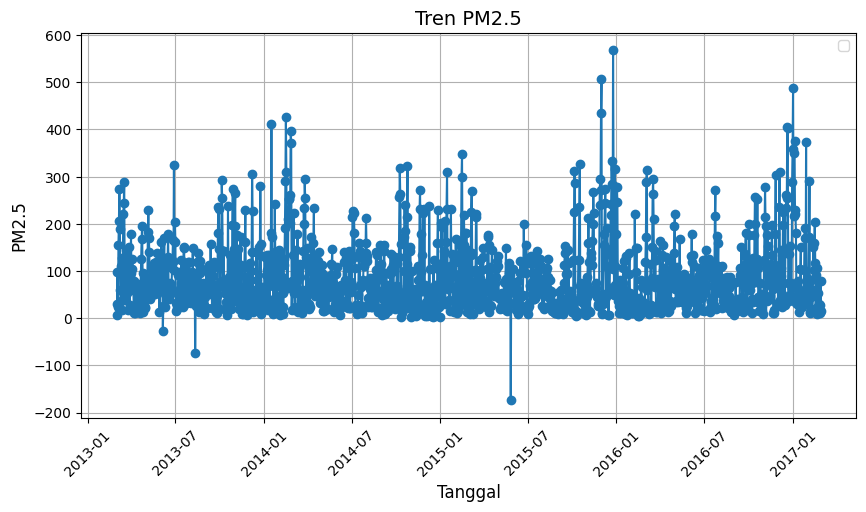

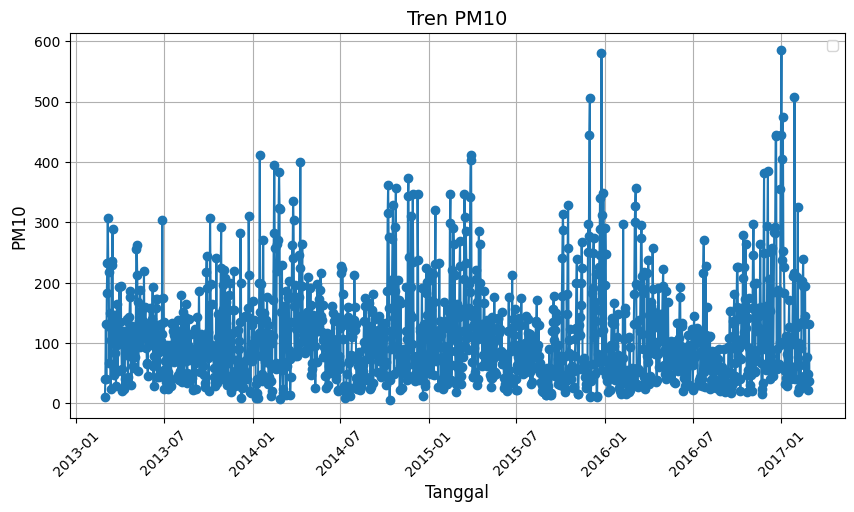

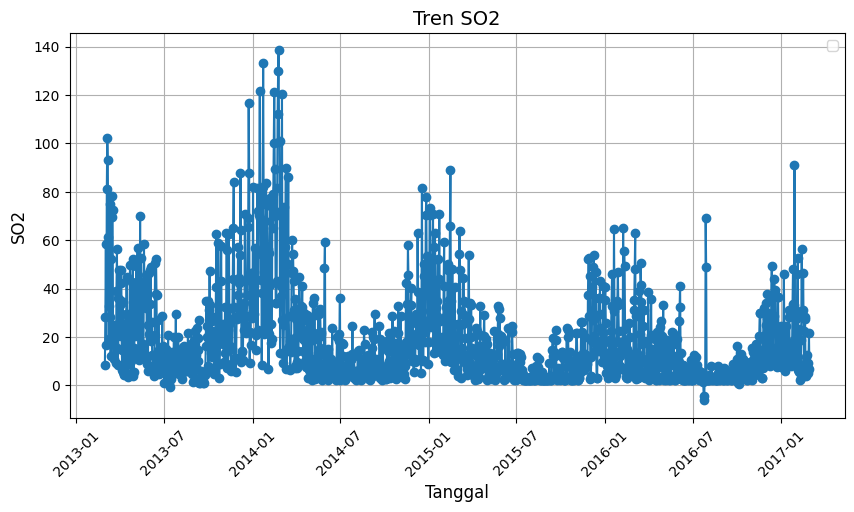

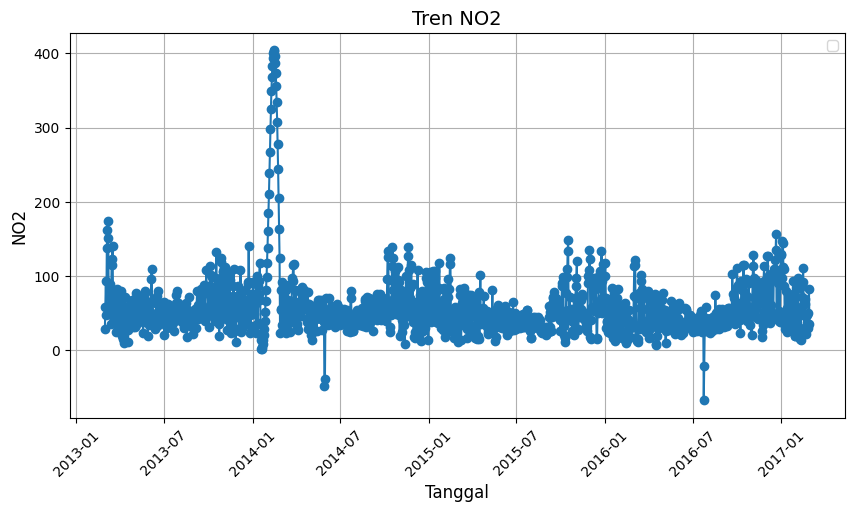

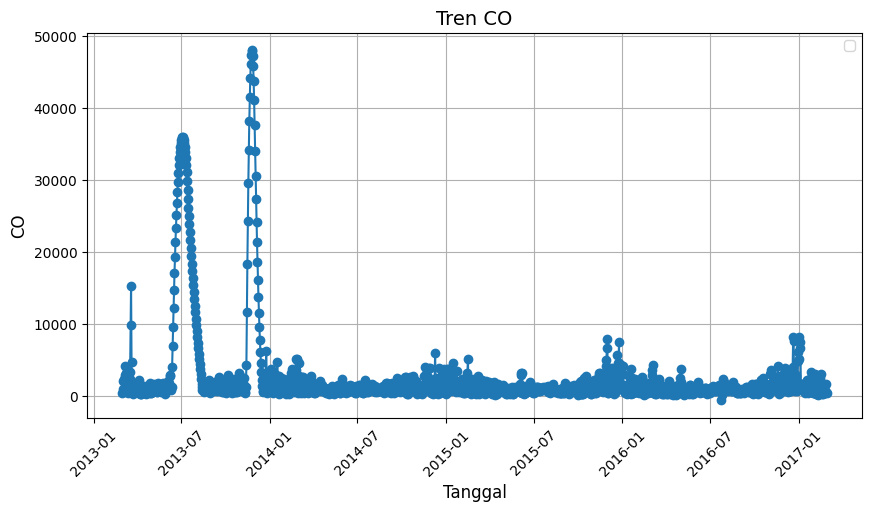

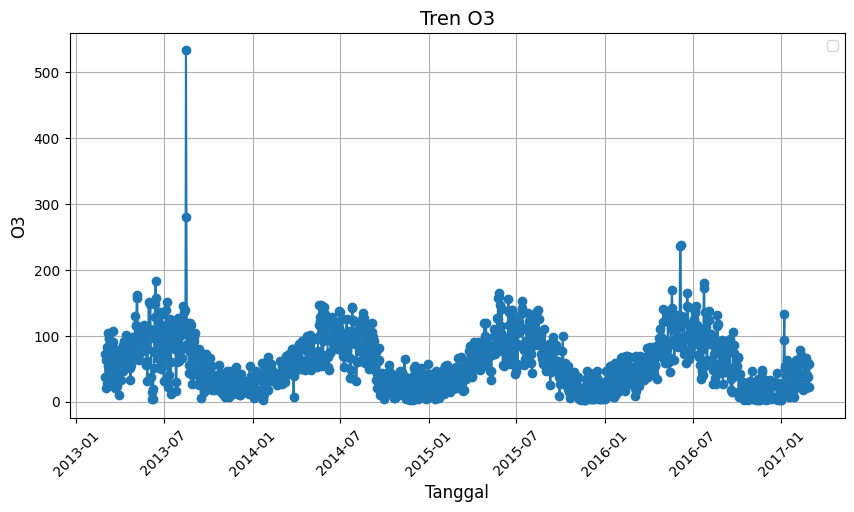

In [140]:
for pol in polution:
    if pol in monthly_average_polution.columns:
        plt.figure(figsize=(10, 5))
        plt.plot(monthly_average_polution["date"],
                 monthly_average_polution[pol],
                 marker='o',
                 linestyle='-'
                 )
        plt.title(f"Tren {pol}", fontsize=14)
        plt.xlabel("Tanggal", fontsize=12)
        plt.ylabel(pol, fontsize=12)
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.show()

### Pertanyaan 2:

<ipython-input-141-ce3e1d907693>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


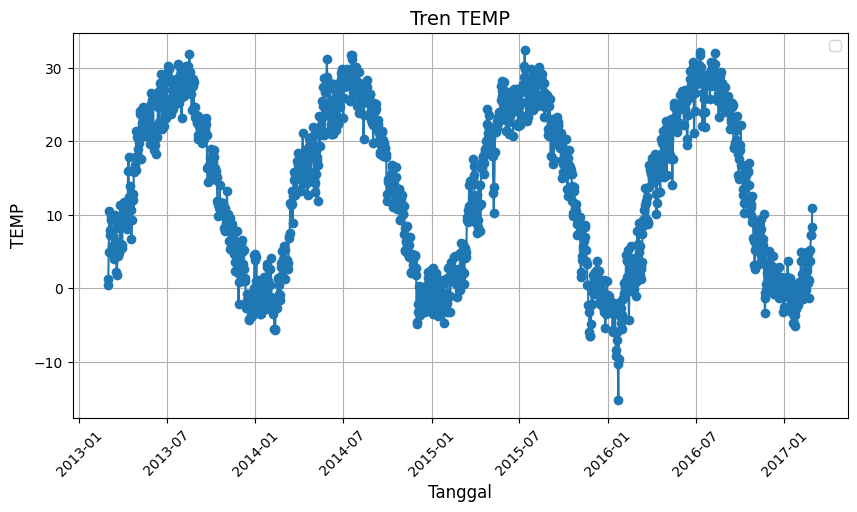

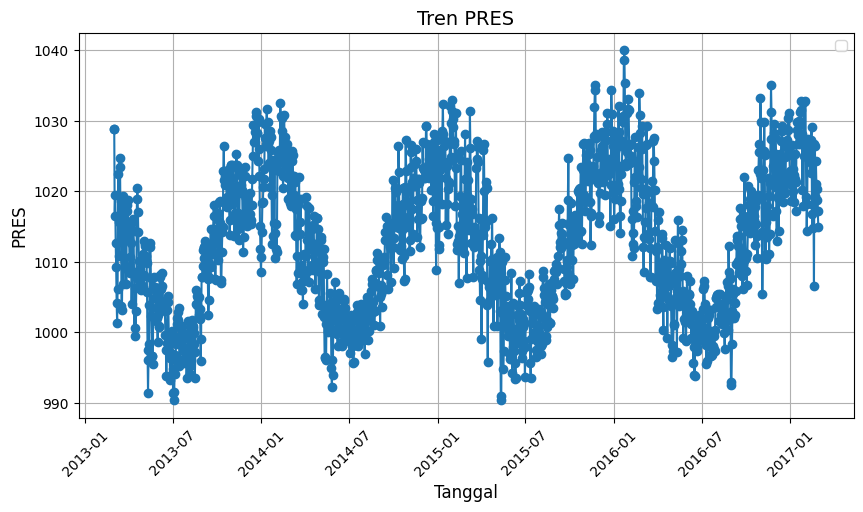

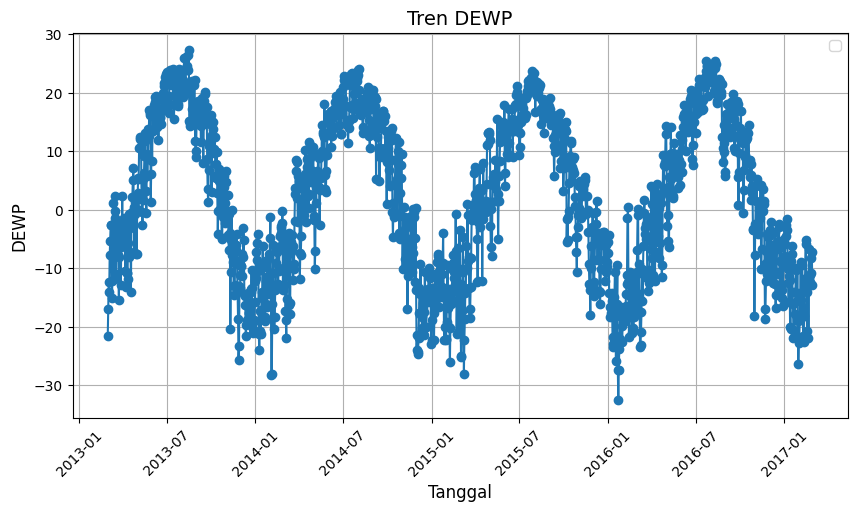

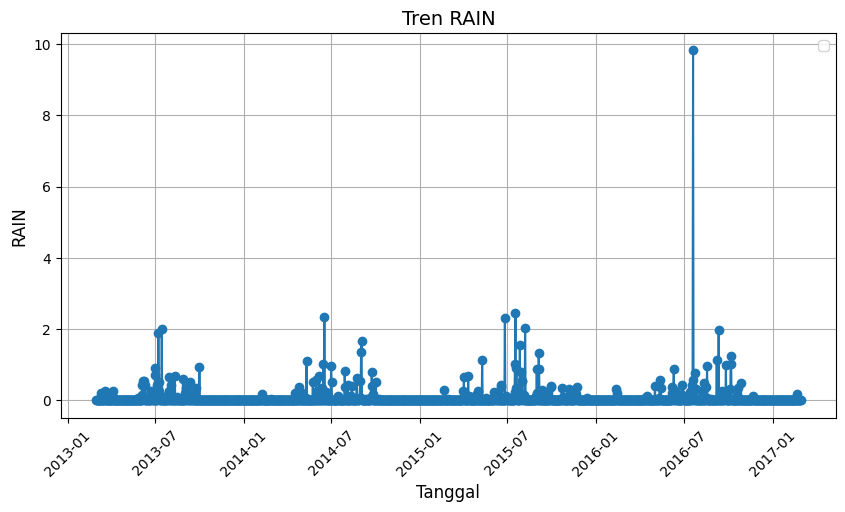

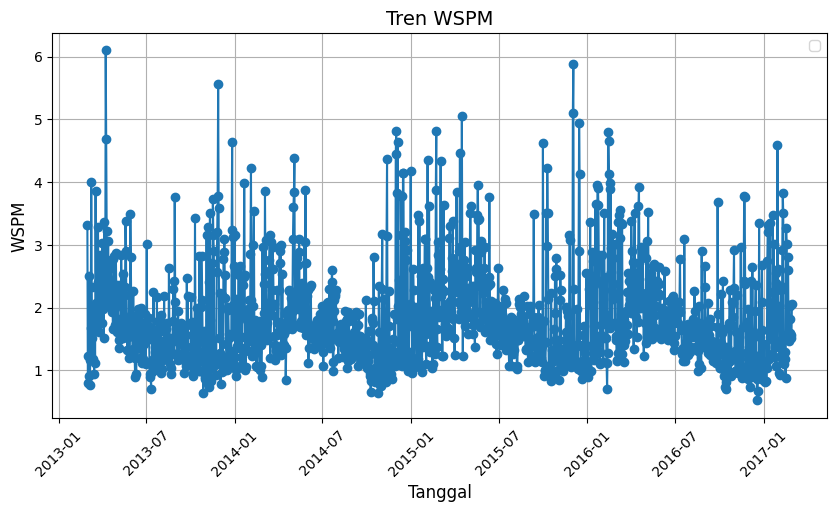

In [141]:
for wea in weather:
    if wea in monthly_average_weather.columns:
        plt.figure(figsize=(10, 5))
        plt.plot(monthly_average_weather["date"],
                 monthly_average_weather[wea],
                 marker='o',
                 linestyle='-'
                 )
        plt.title(f"Tren {wea}", fontsize=14)
        plt.xlabel("Tanggal", fontsize=12)
        plt.ylabel(wea, fontsize=12)
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.show()

**Insight:**
- didapat bahwasannya tren dari cuaca berjenis musiman. dikarenakan ada pada kurun waktu tertentu naik ada juga yang turun.
- didapat pula tren dari polutan berjenis musiman juga.
- visualisasi ini hanya memperlihatkan seluruh waktu bukan pada rentang berapa dan berapa.

## Analisis Lanjutan (Opsional)

## Conclusion

- Tren untuk rata-rata harian pada atribut polutan berjenis musiman atau bisa dibilang naik turun seiring berjalannya waktu.
- Tren untuk rata-rata harian pada atribut cuaca pun juga sama berjenis musiman. Akan tetapi pada atribut RAIN ada satu data yang sangat jauh dari rata-rata keseluruhan data.

In [143]:
dongsi_df.to_csv("dongsi.csv")